Dane gotowe do analizy. Liczba wierszy: 827


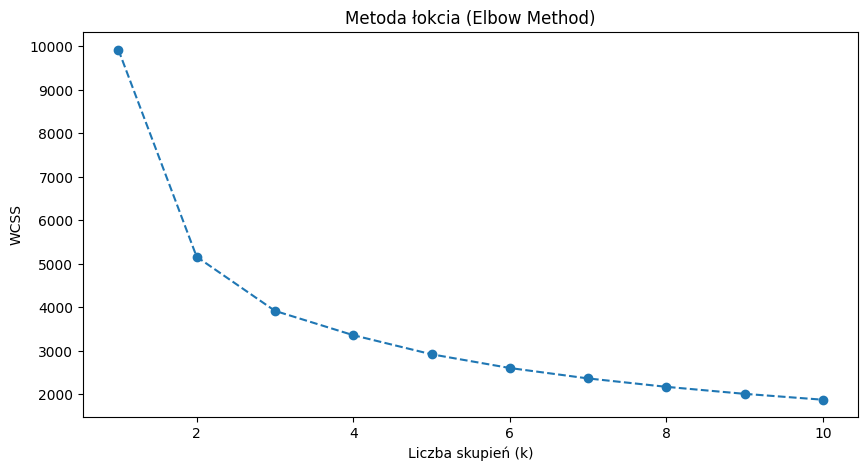

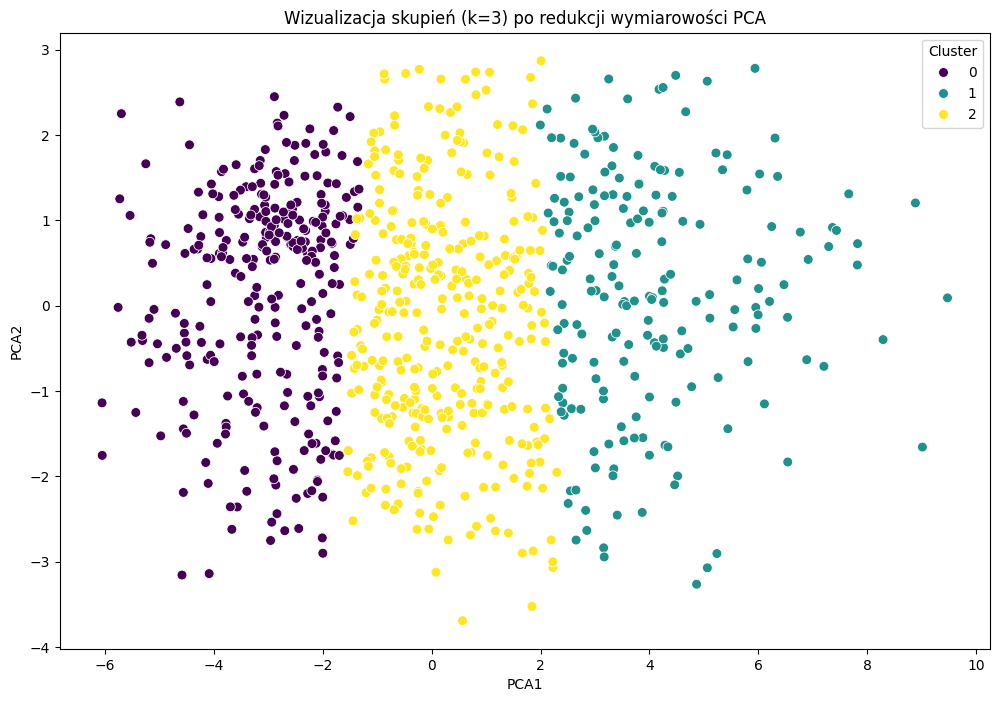


Średnie wartości parametrów dla każdego skupienia:
           CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
Cluster                                                                
0        1.049474   967.466667   3.681053     683.189474   66.877193   
1        4.358462  1537.451282  21.409744    1328.015385  256.830769   
2        2.297983  1220.129683  10.615850     995.118156  142.749280   

         PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)          T  \
Cluster                                                                   
0         1254.217544   68.852632   1302.764912   653.550877  12.822105   
1          672.076923  136.948718   2022.692308  1580.394872  17.872308   
2          888.011527  105.438040   1608.069164  1067.573487  16.608069   

                RH        AH  
Cluster                       
0        52.633684  0.751992  
1        47.755897  0.935466  
2        46.834294  0.839218  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = None 

try:
    df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")
except FileNotFoundError:
    print("Błąd: Nie znaleziono pliku 'AirQualityUCI.csv'.")
    print("Upewnij się, że plik jest w tym samym folderze")

if df is not None:

    # Usuwanie kolumn i wierszy, które są puste
    df = df.dropna(how="all", axis=1).dropna(how="all", axis=0)

    # Zamiana -200 na NaN i usunięcie braków
    df.replace(-200, np.nan, inplace=True)
    df = df.dropna()

    print(f"Dane gotowe do analizy. Liczba wierszy: {len(df)}")

    # Wybór cech (pomijamy kolumny Date i Time)
    features = [
        "CO(GT)",
        "PT08.S1(CO)",
        "C6H6(GT)",
        "PT08.S2(NMHC)",
        "NOx(GT)",
        "PT08.S3(NOx)",
        "NO2(GT)",
        "PT08.S4(NO2)",
        "PT08.S5(O3)",
        "T",
        "RH",
        "AH",
    ]

    # Sprawdzenie czy wszystkie kolumny istnieją w df
    available_features = [col for col in features if col in df.columns]
    X = df[available_features]

    # SKALOWANIE
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ELBOW
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_init=10, n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
    plt.title("Metoda łokcia (Elbow Method)")
    plt.xlabel("Liczba skupień (k)")
    plt.ylabel("WCSS")
    plt.show()

    k = 3
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=42)
    df["Cluster"] = kmeans.fit_predict(X_scaled)

    # WIZUALIZACJA PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df["PCA1"] = X_pca[:, 0]
    df["PCA2"] = X_pca[:, 1]

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=50)
    plt.title(f"Wizualizacja skupień (k={k}) po redukcji wymiarowości PCA")
    plt.show()

    # ANALIZA WYNIKÓW
    print("\nŚrednie wartości parametrów dla każdego skupienia:")
    print(df.groupby("Cluster")[available_features].mean())

else:
    print("Nie można kontynuować analizy z powodu braku danych.")